<a href="https://colab.research.google.com/github/manasdesai/QSTP_Aerial-Robotics_2021/blob/main/Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [190]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

Implement a GH Filter for the data that is generated below. Play with the function and see how your filter performs. \\
Refer to the Chapter on G-H Filter from [Kalman and Bayesian Filters](https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python/blob/master/01-g-h-filter.ipynb)

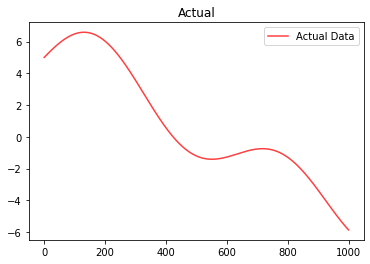

In [191]:
def function(t):
    """This is a linear combination of sine and cosine fucntions
    Implement your own function and play with the filter
    """
    return 2 * np.sin(t/100) + 5 * np.cos(t/350)

T = np.arange(0, 1000, 1.5)
values = [function(t) for t in T]
plt.plot(T, values, color="red", alpha=0.75, label="Actual Data")
plt.title("Actual")
plt.legend();

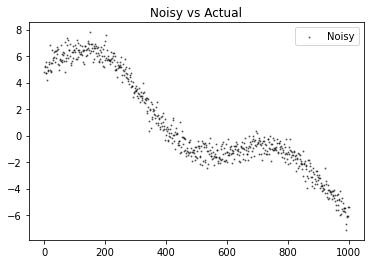

In [192]:
# Add noise to the measurement
def noise(val):
    # x = mu + y * std (Std Normal to Gaussian)
    return val + np.random.randn() * 0.5

values_noisy = [noise(val) for val in values]
plt.scatter(list(T), values_noisy, color="black", alpha=0.5, s=1, label="Noisy")
# plt.plot(T, values, color="red", alpha=0.75, label="Actual")
plt.title("Noisy vs Actual")
plt.legend();

# Task I
Filter the list `values_noisy` using a GH Filter and get an estimate close to the real Value. You can plot `values_filtered`, `values_noisy` and `values` to get to know how filtering works

In [193]:
"""Implement a GH_Filter Here"""
def GHFilter(noisy_values: list, g: float, h: float)->list:
    filtered_values = []

    # Adjust and play with G and H values. You can also plot filtered
    # data for various g and h values also

    g = g # 0.9
    h = h # 0.1
    dt=1

    # Implement the Algorithm here
    x_est = 5
    dx=0.02
    filtered_values = []
    for z in noisy_values:
        # prediction step
        x_pred = x_est + (dx*dt)
        dx = dx

        # update step
        residual = z - x_pred
        dx = dx + h * (residual) / dt
        x_est = x_pred + g * residual
        filtered_values.append(x_est)
    return np.array(filtered_values)

    
    

    
    




    return filtered_values

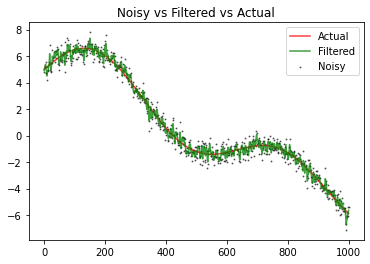

In [194]:
g = 0.55
h = 0.015
values_filtered = GHFilter(values_noisy,g, h)
plt.scatter(list(T), values_noisy, color="black", alpha=0.5, s=1, label="Noisy")
plt.plot(T, values, color="red", alpha=0.75, label="Actual")
plt.plot(T, values_filtered, color="green", alpha=0.75, label="Filtered")
plt.title("Noisy vs Filtered vs Actual")
plt.legend();

# Task II: Track the drone
My drone is travelling in 3D. But my sensors are a mess. Use three GH Filters to filter `x, y, z` given the data

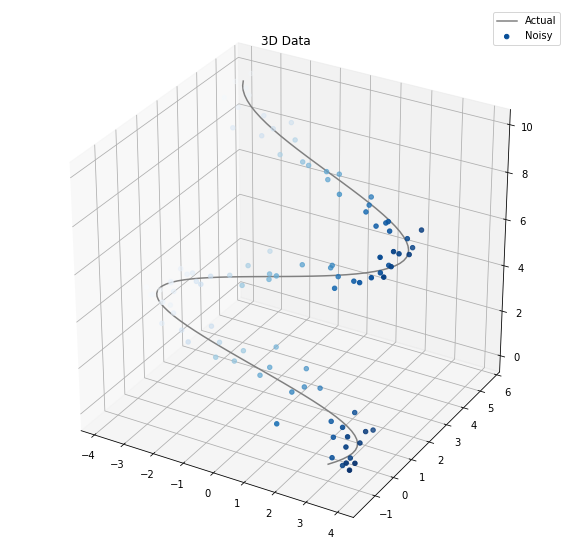

In [195]:
# Data Generation

T = np.arange(0, 10, 0.1)

# Actual data
z = T
x = 2 * np.sin(z) + 3 * np.cos(z)
y = 0.03 * z**2 + 0.0022 * z **3 - 0.3 **z

# Noisy
z_noisy = z + np.random.randn(z.shape[0]) * 0.1
x_noisy = x + np.random.randn(z.shape[0]) * 0.25
y_noisy = y + np.random.randn(z.shape[0]) * 0.5

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")
ax.plot3D(x, y, z, 'gray', label="Actual")
ax.scatter3D(x_noisy, y_noisy, z_noisy, c=x_noisy, cmap="Blues", label="Noisy")
plt.title("3D Data")
plt.legend();

In [196]:
# For a better visualisation, use plotly
# This is only for plotting. Dont panic if you dont understand this
# Refer to https://plotly.com/python/3d-line-plots/
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d(
    x=x_noisy, y=y_noisy, z=z_noisy, name="Noisy",
    marker=dict(
        size=4,
        color=z,
        colorscale='Viridis',
    ),
    line=dict(
        color='blue',
        width=0.1
    )), go.Scatter3d(
    x=x, y=y, z=z, name="Actual",
    marker=dict(
        size=1,
        color=z,
        colorscale='Viridis',
    ),
    line=dict(
        color='red',
        width=5
    )
)])

fig.update_layout(
    width=800,
    height=700,
    autosize=False,
    scene=dict(
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=0,
                y=1.0707,
                z=1,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    ),
)
fig.show()

In [197]:
# Implement three GH Filters to obtain the filtered output
def GHFilter_x(x_noisy: list,g: float,h: float,dt):

  x_filtered = []

    # Adjust and play with G and H values. You can also plot filtered
    # data for various g and h values also

  g = g # 0.9
  h = h # 0.1
  

    # Implement the Algorithm here
  x_est =3
  dx=0.05
    
  for z in x_noisy:

        # prediction step
    x_pred = x_est + (dx*dt)
    dx = dx

        # update step
    residual = z - x_pred
    dx = dx + h * (residual) / dt
    x_est = x_pred + g * residual
    x_filtered.append(x_est)
  return np.array(x_filtered)
def GHFilter_z(z_noisy: list,g: float,h: float,dt):

  z_filtered=[]
  z_est=0
  dz=0.05
  for z in z_noisy:

    z_pred=z_est+ (dz*dt)
    dz=dz
    residual=z-z_pred
    dz=dz+(h*residual)/dt
    z_est=z_pred+(g*residual)
    z_filtered.append(z_est)
  return np.array(z_filtered)
def GHFilter_y(y_noisy: list,g: float,h: float,dt):
  y_filtered=[]
  y_est=-1
  dy=0.05
  for z in y_noisy:
    y_pred=y_est+(dy*dt)
    dy=dy
    residual=z-y_pred
    dy=dy+(h*residual)/dt
    y_est=y_pred+(g*residual)
    y_filtered.append(y_est)
  return np.array(y_filtered)  


# Store them in numpy arrays x_filtered, y_filtered, z_filtered

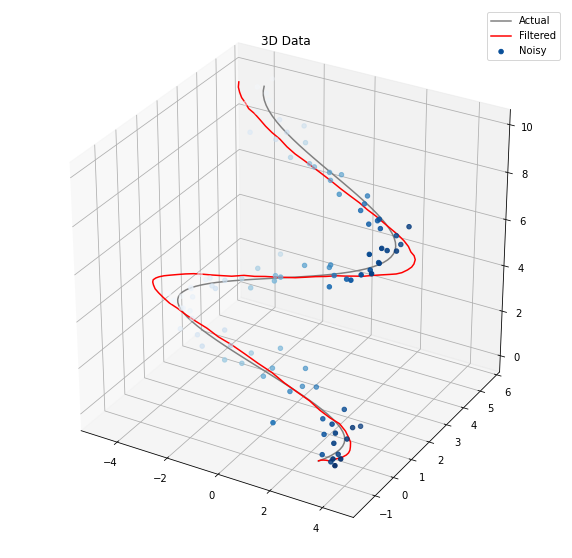

In [198]:
# Plot Results


dt=0.05
x_filtered=GHFilter_x(x_noisy,0.05,0.05,dt)
y_filtered=GHFilter_y(y_noisy,0.06,0.015,dt)
z_filtered=GHFilter_z(z_noisy,0.05,0.015,dt)

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")
ax.plot3D(x, y, z, 'gray', label="Actual")
ax.plot3D(x_filtered, y_filtered, z_filtered, 'red', label="Filtered")
ax.scatter3D(x_noisy, y_noisy, z_noisy, c=x_noisy, cmap="Blues", label="Noisy")
plt.title("3D Data")
plt.legend();